# Exploratory analysis

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# data distribution

In [4]:
train_data = pd.read_csv('train.csv')
df=train_data.copy()
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


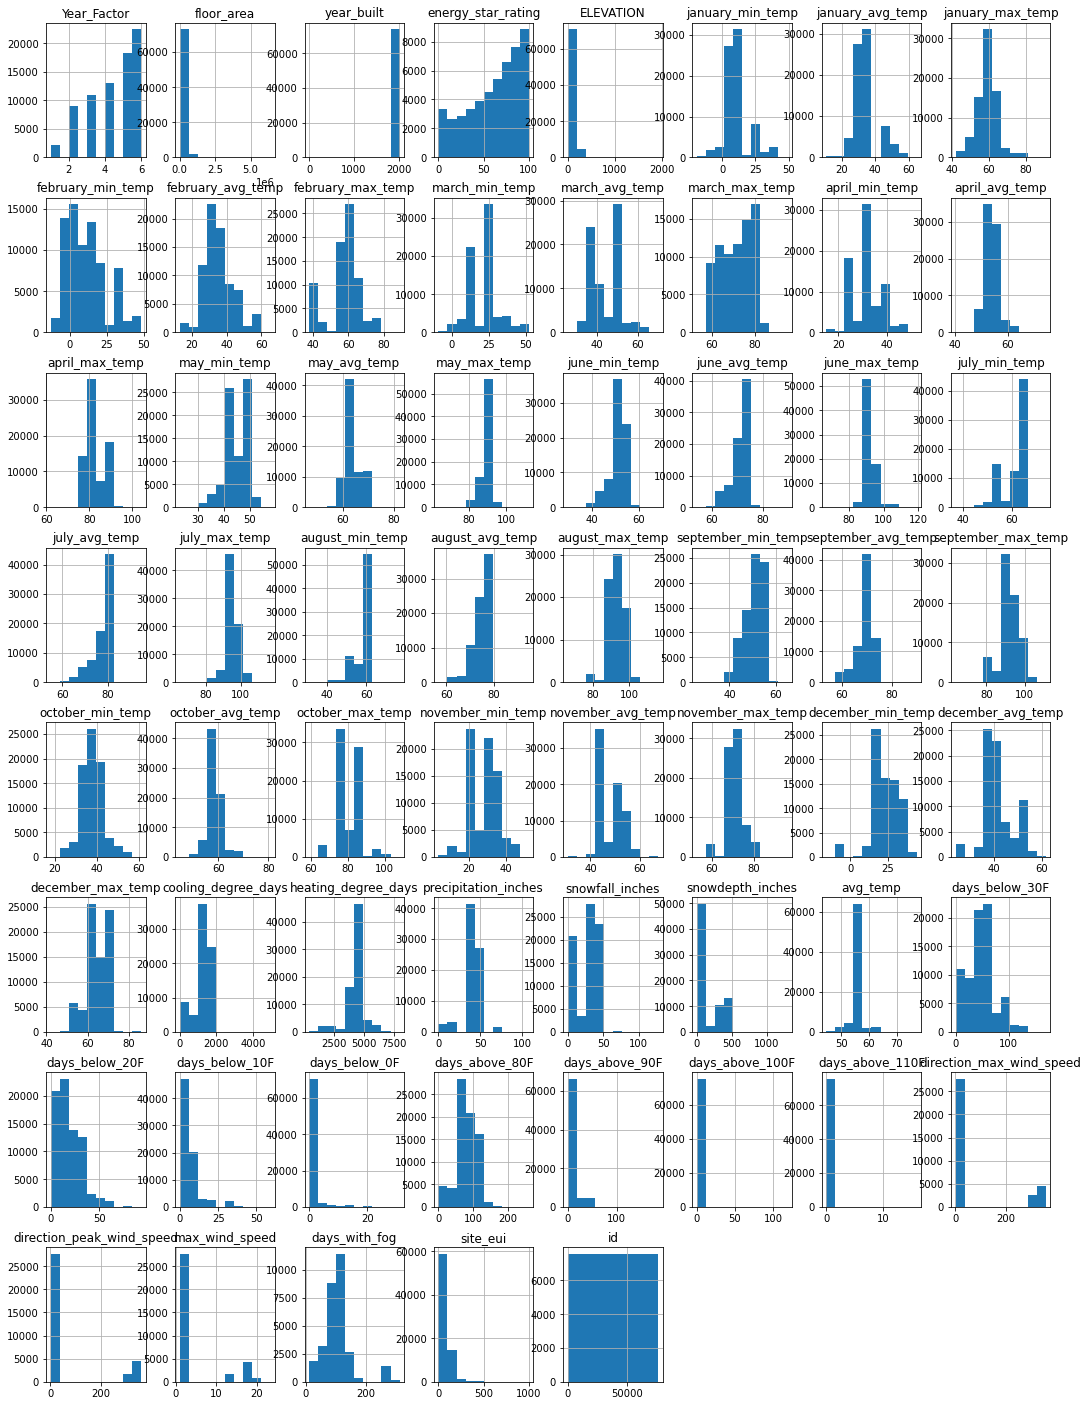

In [12]:
df.hist(figsize=(18,25))
plt.show()
#look at feature range
#look at feature distribution(if tail-heavy, then need transformation)

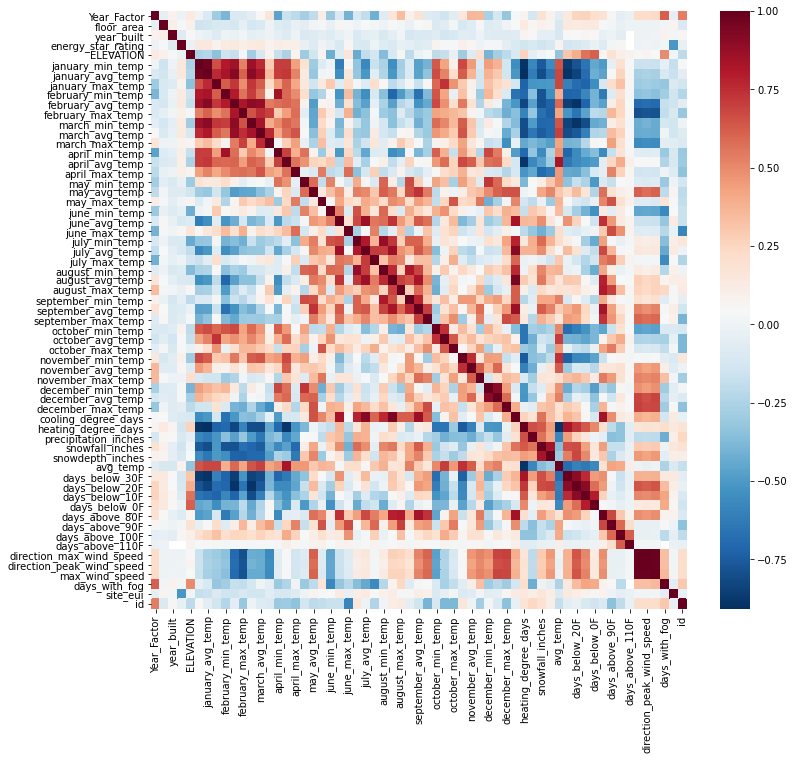

In [21]:
correlations = df.corr()
plt.figure(figsize=(12,11))
sns.heatmap(correlations, cmap='RdBu_r',yticklabels=1)
plt.show()
# negatively correlated with energy star and postively with some temp and days feature

In [23]:
df[['site_eui','energy_star_rating']].corr()

,site_eui,energy_star_rating
site_eui,1.000000,-0.511012
energy_star_rating,-0.511012,1.000000


In [28]:
#absolute vaules of the corr
correlations['site_eui'].sort_values(ascending=False).head(10)
#it seems heating is more correlated w/ eui than cooling 

site_eui                1.000000
snowfall_inches         0.157284
heating_degree_days     0.147861
days_below_30F          0.139811
july_avg_temp           0.133856
cooling_degree_days     0.125004
june_avg_temp           0.122019
days_below_20F          0.119492
august_avg_temp         0.113786
precipitation_inches    0.113558
Name: site_eui, dtype: float64

In [31]:
#absolute vaules of the corr
correlations['site_eui'].sort_values(ascending=False).tail(10)
#it seems heating is more correlated w/ eui than cooling 

february_max_temp    -0.106693
april_min_temp       -0.111528
april_avg_temp       -0.113008
march_min_temp       -0.134110
march_avg_temp       -0.135303
february_min_temp    -0.147348
february_avg_temp    -0.154071
january_avg_temp     -0.167982
january_min_temp     -0.179190
energy_star_rating   -0.511012
Name: site_eui, dtype: float64

In [32]:
#absolute vaules of the corr
correlations['site_eui'].abs().sort_values(ascending=False).head(10)
#it seems heating is more correlated w/ eui than cooling 

site_eui               1.000000
energy_star_rating     0.511012
january_min_temp       0.179190
january_avg_temp       0.167982
snowfall_inches        0.157284
february_avg_temp      0.154071
heating_degree_days    0.147861
february_min_temp      0.147348
days_below_30F         0.139811
march_avg_temp         0.135303
Name: site_eui, dtype: float64

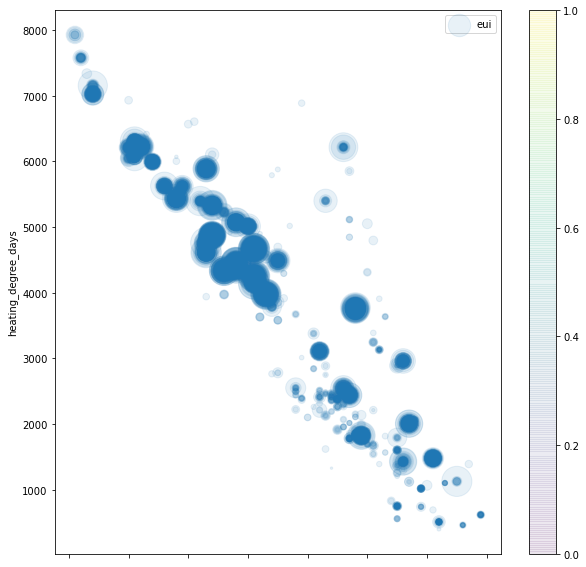

In [48]:
df.plot(kind='scatter',x='january_min_temp',y='heating_degree_days',alpha=0.1,
       label='eui',s='site_eui', cmap=plt.get_cmap("jet"),
        colorbar=True,figsize=(10,10))
plt.legend()

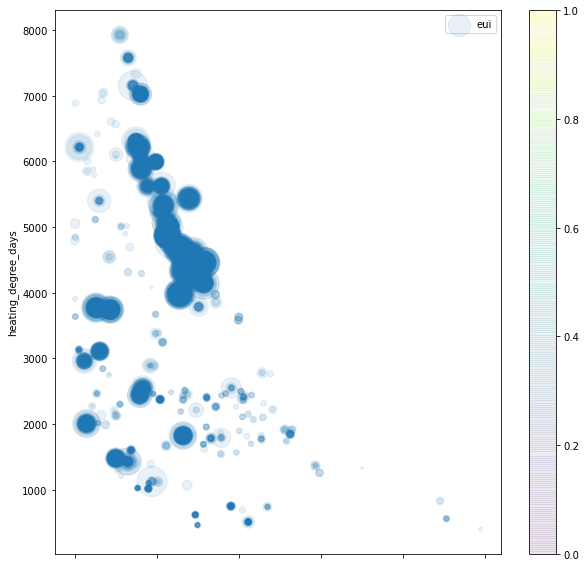

In [49]:
df.plot(kind='scatter',x='cooling_degree_days',y='heating_degree_days',alpha=0.1,
       label='eui',s='site_eui', cmap=plt.get_cmap("jet"),
        colorbar=True,figsize=(10,10))
plt.legend()

array([[<AxesSubplot:xlabel='site_eui', ylabel='site_eui'>,
        <AxesSubplot:xlabel='cooling_degree_days', ylabel='site_eui'>,
        <AxesSubplot:xlabel='heating_degree_days', ylabel='site_eui'>,
        <AxesSubplot:xlabel='energy_star_rating', ylabel='site_eui'>,
        <AxesSubplot:xlabel='january_min_temp', ylabel='site_eui'>],
       [<AxesSubplot:xlabel='site_eui', ylabel='cooling_degree_days'>,
        <AxesSubplot:xlabel='cooling_degree_days', ylabel='cooling_degree_days'>,
        <AxesSubplot:xlabel='heating_degree_days', ylabel='cooling_degree_days'>,
        <AxesSubplot:xlabel='energy_star_rating', ylabel='cooling_degree_days'>,
        <AxesSubplot:xlabel='january_min_temp', ylabel='cooling_degree_days'>],
       [<AxesSubplot:xlabel='site_eui', ylabel='heating_degree_days'>,
        <AxesSubplot:xlabel='cooling_degree_days', ylabel='heating_degree_days'>,
        <AxesSubplot:xlabel='heating_degree_days', ylabel='heating_degree_days'>,
        <AxesSubplot:xlabel=

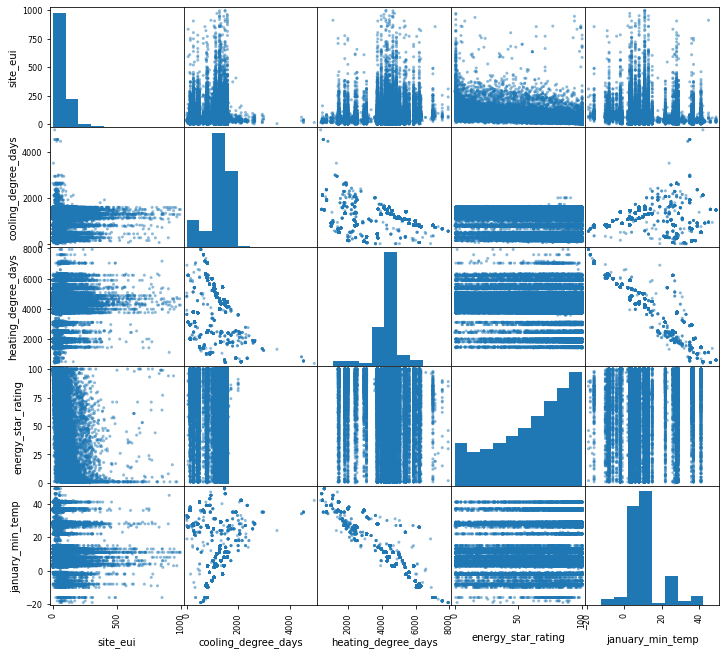

In [54]:
from pandas.plotting import scatter_matrix
attributes=['site_eui','cooling_degree_days', 'heating_degree_days', 
            'energy_star_rating', 'january_min_temp']
scatter_matrix(df[attributes],figsize=(12,11))

In [58]:
df_cat = df.select_dtypes(include=['object'])


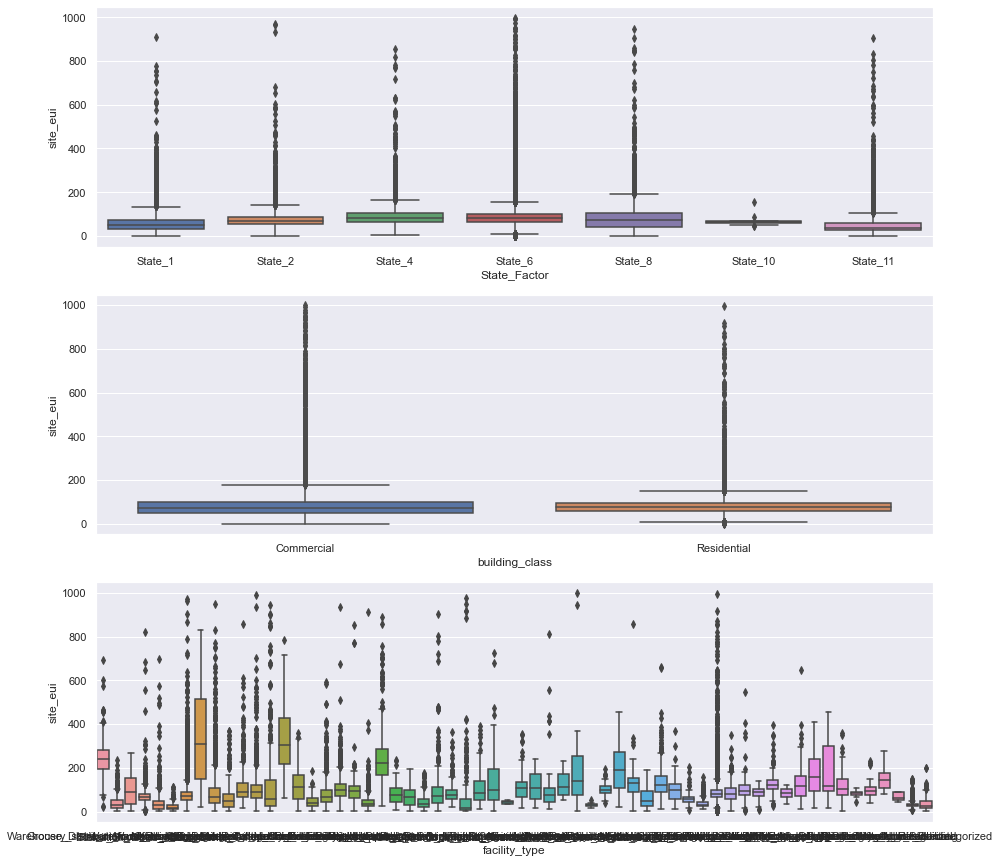

In [63]:
plt.figure(figsize=(15, 15))
sns.set(style="darkgrid")
i=1
for col in df_cat.columns:
    plt.subplot(3,1,i)
    sns.boxplot(data=df, x=col, y='site_eui')
    i=i+1
plt.show()

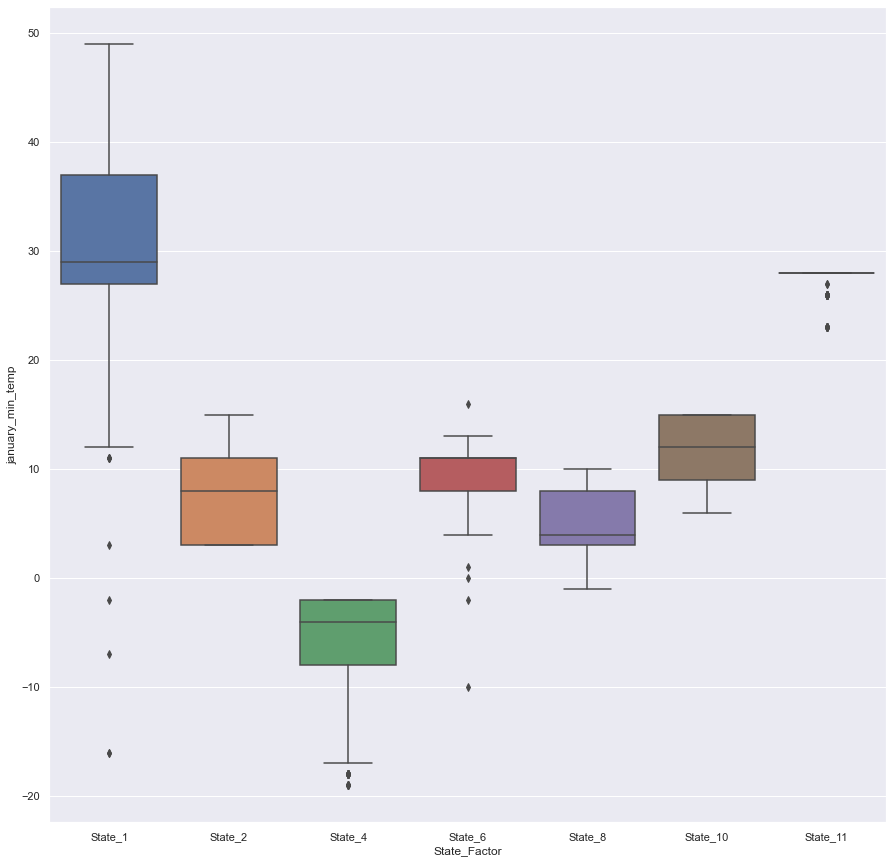

In [64]:
plt.figure(figsize=(15, 15))
sns.set(style="darkgrid")
sns.boxplot(data=df, x='State_Factor', y='january_min_temp')
plt.show()